In [1]:
import numpy as np
from scipy.stats import norm, t
from statsmodels.stats.power import tt_ind_solve_power, zt_ind_solve_power
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.meta_analysis import effectsize_smd
from typing import Union
import plotly.graph_objects as go
from scipy import stats
from math import asin
import numpy as np
import math
import scipy.stats as stats

In [2]:
#Расчёт effect_size для пропорций
def calc_propotion_effect_size(conv_1: int, nobs_1: int, conv_2: int, nobs_2: int):
    prob_1, prob_2 = conv_1 / nobs_1, conv_2 / nobs_2
    
    es_formula = 2  * asin(np.sqrt(prob_1)) - 2 * asin(np.sqrt(prob_2))
    es_import = proportion_effectsize(prob_1, prob_2)
    
    return es_formula, es_import

#Расчёт effect_size для непрерывных метрик
def calc_continuous_effect_size(mean_1: Union[float, int],
                                std_1: Union[float, int],
                                mean_2: Union[float, int],
                                std_2: Union[float, int],
                                nobs_1: int = 10_000,
                                nobs_2: int = 10_000):
    
    es_formula = (mean_1 - mean_2) / ((std_1**2 + std_2**2) / 2) ** 0.5
    es_import = effectsize_smd(mean_1, std_1, nobs_1, mean_2, std_2, nobs_2)[0]
    
    return es_formula, es_import 

In [3]:
#Расчёт минимально необходимой выборки * 2(для теста и контроля) для пропорций
def calc_sample_size_proportion(effect_size: float,
                                alpha: float = .05,
                                beta: float = .2,
                                ratio: Union[float, int] = 1):
    
    n = zt_ind_solve_power(effect_size=effect_size,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=ratio,
                  )
    return int(n * 2)
#Расчёт минимально необходимой выборки * 2(для теста и контроля) для непрерывной метрики
def calc_sample_size_continuous(effect_size: float,
                                alpha: float = .05,
                                beta: float = .2,
                                ratio: Union[float, int] = 1):
    
    n = tt_ind_solve_power(effect_size=effect_size,
                           alpha=alpha,
                           power=(1 - beta),
                           ratio=ratio,
                  )
    return int(n * 2)

### Практическое задание
* Продакт на главной mail.ru решил протестировать в рекомендательной ленте контента вместо карточек со статьями видеоплеер с короткими видео. Нынешний таймспент на юзера в день в среднем равен 25 минут, а стандартная ошибка (SD) равна __156__. Мы предполагаем, что в новой версии таймспент на юзера в день изменится на 10% от текущего значения. Средний трафик  20000 человек в день. Посчитайте сколько дней необходимо держать эксперимент при alpha = 5% и beta = 20%.

In [4]:
mu_control, mu_test = 25, 27.5
std_control, std_test = 156, 156
n = 20000
calc_continuous_effect_size(mean_1=mu_control, std_1=std_control, mean_2=mu_test, std_2=std_test)

(-0.016025641025641024, -0.016025039996486783)

In [5]:
effect_size = calc_continuous_effect_size(mean_1=mu_control, std_1=std_control, mean_2=mu_test, std_2=std_test)[1]
sample = calc_sample_size_continuous(effect_size=effect_size)
effect_size, sample

(-0.016025039996486783, 122257)

In [6]:
print(f"{int(np.ceil(sample/n))} дней необходимо держать тест со стандартной ошибкой (SD) равной 156")

7 дней необходимо держать тест со стандартной ошибкой (SD) равной 156


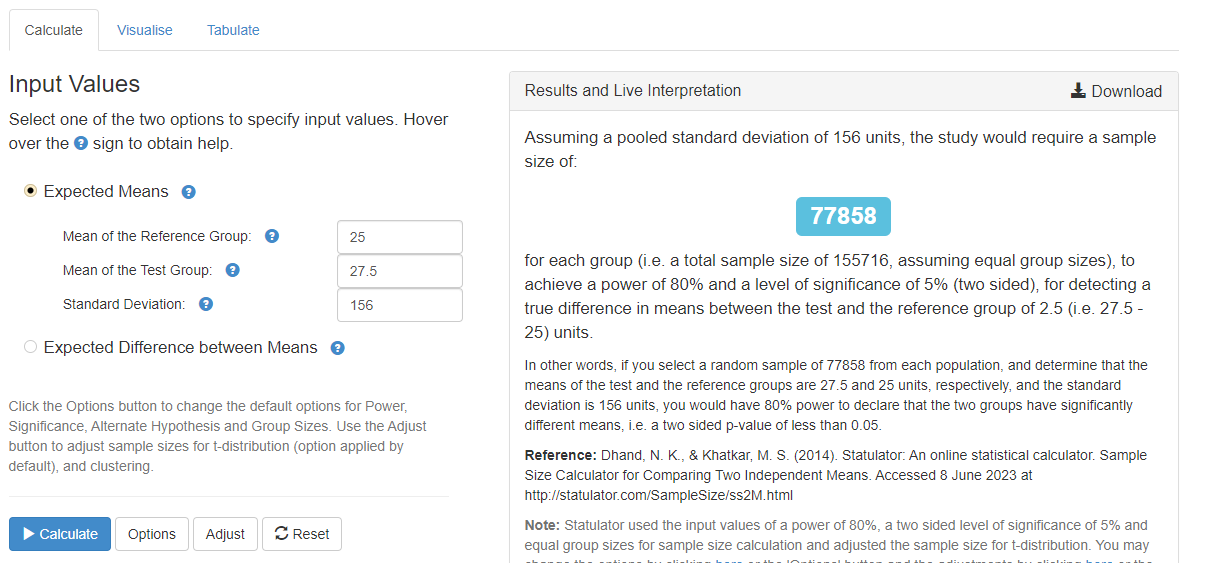

In [7]:
samples = 77858
print(f"{int(np.ceil(samples/n))} дней необходимо держать тест")

4 дней необходимо держать тест


* Продакт на главной mail.ru решил протестировать в рекомендательной ленте контента вместо карточек со статьями видеоплеер с короткими видео. Нынешний таймспент на юзера в день в среднем равен 25 минут, а стандартная ошибка (SD) равна __15__. Мы предполагаем, что в новой версии таймспент на юзера в день изменится на 10% от текущего значения. Средний трафик  20000 человек в день. Посчитайте сколько дней необходимо держать эксперимент при alpha = 5% и beta = 20%.

In [8]:
mu_control, mu_test = 25, 27.5
std_control, std_test = 15, 15
n = 20000
calc_continuous_effect_size(mean_1=mu_control, std_1=std_control, mean_2=mu_test, std_2=std_test)

(-0.16666666666666666, -0.16666041596346254)

In [9]:
effect_size = calc_continuous_effect_size(mean_1=mu_control, std_1=std_control, mean_2=mu_test, std_2=std_test)[1]
sample = calc_sample_size_continuous(effect_size=effect_size)
effect_size, sample

(-0.16666041596346254, 1132)

In [10]:
print(f"{int(np.ceil(sample/n))} дней необходимо держать тест со стандартной ошибкой (SD) равной 15")

1 дней необходимо держать тест со стандартной ошибкой (SD) равной 15


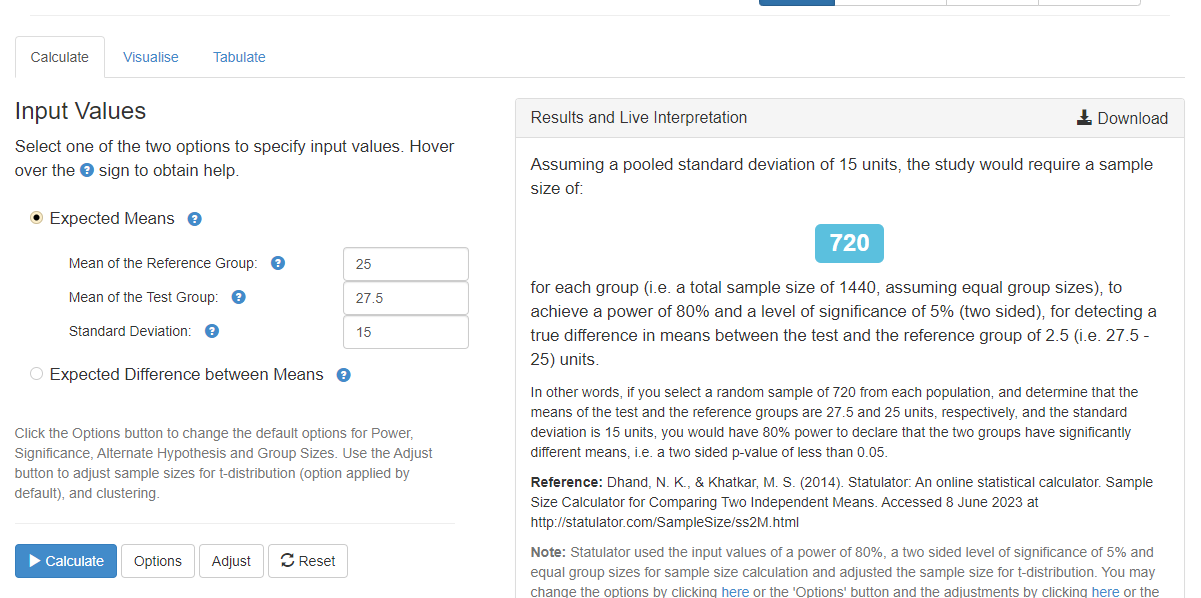

In [11]:
samples = 720
print(f"{int(np.ceil(samples/n))} дней необходимо держать тест")

1 дней необходимо держать тест


* Наша продуктовая команда в ecommerce магазине планирует запустить тест, направленный на ускорение загрузки сайта. Одна из основных метрик bounce rate в GA = 40%. Мы предполагаем, что при оптимизации сайта изменится минимум на 20% от текущего показателя. Средний трафик  4000 человек в день. Посчитайте сколько нам нужно дней держать эксперимент при alpha = 5% и beta = 20%

In [12]:
mu_control, mu_test = 0.40, 0.32
n = 4000
std_control = math.sqrt(mu_control * (1 - mu_control))
std_test = std_control*math.sqrt(mu_test * (1 - mu_test))
std_control, std_test

(0.4898979485566356, 0.2285257097133712)

In [13]:
effect_size = calc_continuous_effect_size(mean_1=mu_control, std_1=std_control, mean_2=mu_test, std_2=std_test)[1]
sample = calc_sample_size_continuous(effect_size=effect_size)
effect_size, sample

(0.20928145984190166, 718)

In [14]:
print(f"{int(np.ceil(sample/n))} дней необходимо держать тест")

1 дней необходимо держать тест


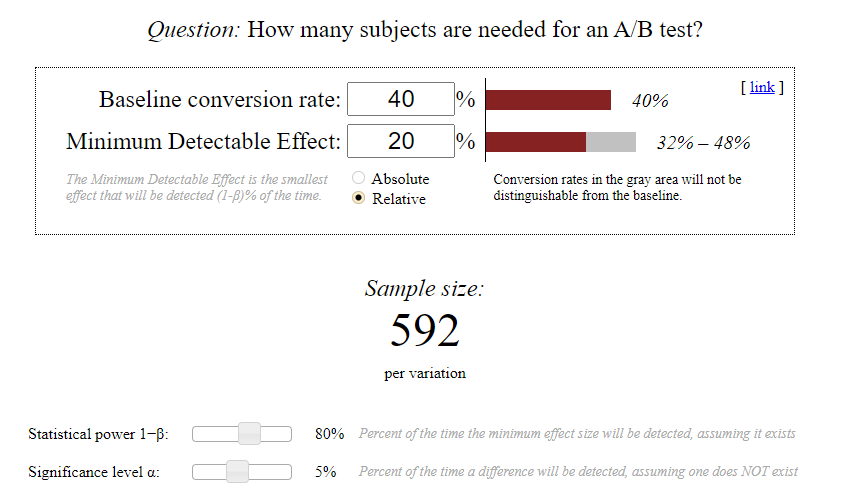

In [15]:
samples = 592
print(f"{int(np.ceil(samples/n))} дней необходимо держать тест")

1 дней необходимо держать тест
